# D-optimal experiment design: comparing ABPG and Frank-Wolfe
Solve the D-Optimal experiment design problem
$$
\begin{array}{ll}
\textrm{minimize}   & F(x):=\log\left(\det\left(\sum_{i=1}^n x_i V_i V_i^T\right)\right) \\
\textrm{subject to} & \sum_{i=1}^n x_i = 1, \\ 
                    & x_i\geq 0, \quad i=1,\ldots,n
\end{array}
$$
where $V_i\in R^m$ for $i=1,\ldots,n$.

Methods compared:
* Original Frank-Wolfe method
* Frank-Wolfe method with away steps
* Bregman Proximal Gradient (BPG) method with adaptive line search
* Accelerated Bregman Proximal Gradient (ABPG) method with gain adaption

In [1]:
cd  C:\\github\accbpg

C:\github\accbpg


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import accbpg

In [3]:
n = 2000
m = [100, 200, 400, 600, 800, 1000]
K = 10
eps = ['1e-3', '1e-4', '1e-5', '1e-6', '1e-7', '1e-8']

Nmax = 100000
Nskip = int(Nmax/10)

Ieps = dict()
Teps = dict()
for s in eps:
    Ieps[s] = np.zeros((4, len(m), K))
    Teps[s] = np.zeros((4, len(m), K))

for i in range(len(m)):
    print("\n********** m = {0:d}, n = {1:d} **********".format(m[i], n))
    for k in range(K):
        f, h, L, x0Kh = accbpg.D_opt_design(m[i], n)
        x0KY = accbpg.D_opt_KYinit(f.H)
        x0Mx = (1-1e-3)*x0KY + 1e-3*x0Kh

        _, F_FWKY, _, _, T_FWKY = accbpg.D_opt_FW(f.H, x0KY, 1e-8, maxitrs=Nmax, verbskip=Nskip)
        _, F_WAKY, _, _, T_WAKY = accbpg.D_opt_FW_away(f.H, x0KY, 1e-8, maxitrs=Nmax, verbskip=Nskip)
        _, F_LSKh, _, T_LSKh = accbpg.BPG(f, h, L, x0Kh, maxitrs=Nmax, linesearch=True, ls_ratio=1.5, verbskip=Nskip)
        _, F_ABKh, _, _, _, T_ABKh = accbpg.ABPG_gain(f, h, L, x0Kh, gamma=2, maxitrs=Nmax, ls_inc=1.5, ls_dec=1.5, restart=True, verbskip=Nskip)

        Fmin = min(F_FWKY.min(), F_WAKY.min(), F_LSKh.min(), F_ABKh.min())
        F = [F_FWKY, F_WAKY, F_LSKh, F_ABKh]
        T = [T_FWKY, T_WAKY, T_LSKh, T_ABKh]
        for s in eps:
            for j in range(len(F)):
                I_eps = np.nonzero(F[j] - Fmin <= float(s))
                if len(I_eps[0]) > 0:
                    i_eps = I_eps[0][0]
                    t_eps = T[j][i_eps]
                else:
                    i_eps = Nmax + 1
                    t_eps = T[j][-1]
                Ieps[s][j,i,k] = i_eps
                Teps[s][j,i,k] = t_eps


********** m = 100, n = 2000 **********

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   1.955e+01   1.943e+00   2.081e-01     0.0
 10000  -8.413e+00   6.024e-03   2.829e-01     1.5
 20000  -8.517e+00   3.413e-03   2.763e-01     3.1
 30000  -8.561e+00   2.432e-03   2.738e-01     4.6
 40000  -8.585e+00   1.905e-03   2.720e-01     6.0
 50000  -8.600e+00   1.568e-03   2.712e-01     7.4
 60000  -8.611e+00   1.369e-03   2.706e-01     8.7
 70000  -8.619e+00   1.191e-03   2.699e-01    10.1
 80000  -8.626e+00   1.063e-03   2.694e-01    11.5
 90000  -8.631e+00   9.303e-04   2.689e-01    12.9

Solving D-opt design problem using Frank-Wolfe method with away steps
     k      F(x)     pos_slack   neg_slack    time
     0   1.955e+01   1.943e+00   2.081e-01     0.0

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   3.274e+00   6.667e-01     0.0
 10000  -8.669e+00   8.779e-02   204.9


 60000  -9.271e+00   1.317e-01  1249.3
 70000  -9.271e+00   1.975e-01  1450.1
 80000  -9.272e+00   8.779e-02  1657.2
 90000  -9.272e+00   1.317e-01  1860.5

ABPG_gain method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta         Gk         TSG       D(x+,y)     D(z+,z)      Gavg       time
     0   2.859e+00   1.000e+00   6.667e-01   1.000e+00   1.084e-01   1.084e-01   8.165e-01     0.0
 10000  -9.273e+00   6.341e-04   1.317e-01   6.172e-01   7.277e-12   2.933e-05   1.779e-01   273.0
 20000  -9.273e+00   4.159e-04   1.975e-01   8.590e-01   1.034e-12   6.957e-06   1.784e-01   558.3
 30000  -9.273e+00   3.807e-04   1.975e-01   7.388e-01   4.181e-13   3.906e-06   1.780e-01   814.3
 40000  -9.273e+00   3.490e-04   1.975e-01   6.598e-01   1.317e-13   1.638e-06   1.761e-01  1075.4
 50000  -9.273e+00   4.298e-04   1.317e-01   4.056e-01   5.684e-14   7.588e-07   1.744e-01  1354.7
 60000  -9.273e+00   3.733e-04   1.975e-01   6.112e-01   3.841e-14   4.509e-07   1.741e-01  163

 70000  -8.631e+00   8.690e-04   3.902e-02   1.213e+00   3.118e-13   3.403e-07   1.188e-01  1763.8
 80000  -8.631e+00   5.564e-04   8.779e-02   9.055e-02   3.109e-15   1.109e-07   1.210e-01  2015.1
 90000  -8.631e+00   5.282e-04   1.317e-01   4.230e-01   8.660e-15   7.338e-08   1.252e-01  2266.9

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   1.728e+01   1.798e+00   2.647e-01     0.0
 10000  -8.533e+00   5.875e-03   2.954e-01     1.4
 20000  -8.626e+00   3.372e-03   2.892e-01     2.7
 30000  -8.664e+00   2.295e-03   2.866e-01     4.1
 40000  -8.686e+00   1.803e-03   2.851e-01     5.5
 50000  -8.700e+00   1.504e-03   2.841e-01     6.9
 60000  -8.710e+00   1.300e-03   2.832e-01     8.2
 70000  -8.717e+00   1.125e-03   2.825e-01     9.6
 80000  -8.723e+00   9.757e-04   2.820e-01    11.0
 90000  -8.727e+00   9.093e-04   2.816e-01    12.3

Solving D-opt design problem using Frank-Wolfe method with away steps
     k      F(x)

 80000   2.225e+00   1.277e-03   1.578e-01    23.0
 90000   2.218e+00   1.179e-03   1.562e-01    25.8

Solving D-opt design problem using Frank-Wolfe method with away steps
     k      F(x)     pos_slack   neg_slack    time
     0   5.015e+01   2.224e+00   2.409e-01     0.0
 10000   2.128e+00   2.363e-07   2.368e-07     5.9

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   1.053e+01   6.667e-01     0.0
 10000   2.131e+00   5.853e-02   481.1
 20000   2.129e+00   5.853e-02   945.5
 30000   2.129e+00   5.853e-02  1411.1
 40000   2.129e+00   5.853e-02  1871.8
 50000   2.129e+00   1.317e-01  2332.9
 60000   2.128e+00   5.853e-02  2794.7
 70000   2.128e+00   8.779e-02  3258.1
 80000   2.128e+00   5.853e-02  3723.1
 90000   2.128e+00   8.779e-02  4190.4

ABPG_gain method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta         Gk         TSG       D(x+,y)     D(z+,z)      Gavg       time
     0   1.053e+01   1.000e+00   6.66

 50000   2.110e+00   8.779e-02  2337.2
 60000   2.110e+00   5.853e-02  2802.0
 70000   2.110e+00   5.853e-02  3267.4
 80000   2.110e+00   8.779e-02  3745.5
 90000   2.110e+00   3.902e-02  4265.9

ABPG_gain method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta         Gk         TSG       D(x+,y)     D(z+,z)      Gavg       time
     0   1.058e+01   1.000e+00   6.667e-01   1.000e+00   1.988e-01   1.988e-01   8.165e-01     0.0
 10000   2.110e+00   4.541e-04   1.317e-01   7.767e-01   1.930e-12   1.205e-05   1.074e-01   651.6
 20000   2.110e+00   3.792e-04   1.317e-01   9.663e-01   5.591e-13   4.024e-06   1.072e-01  1301.3
 30000   2.110e+00   3.548e-04   1.317e-01   7.346e-01   1.026e-13   1.110e-06   1.076e-01  1955.1
 40000   2.110e+00   1.363e-03   8.779e-02   1.719e+00   9.437e-14   2.955e-08   1.224e-01  2594.0

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   4.984e+01   1.870e+00   2.221e-01     0.

 10000   1.311e+00   3.635e-04   1.975e-01   7.232e-01   8.846e-13   9.258e-06   1.332e-01   653.9
 20000   1.311e+00   3.771e-04   1.317e-01   7.796e-01   1.457e-13   1.314e-06   1.331e-01  1324.6
 30000   1.311e+00   4.570e-04   8.779e-02   8.893e-01   9.681e-14   5.212e-07   1.340e-01  1972.8
 40000   1.311e+00   1.103e-03   8.779e-02   1.202e+00   1.972e-13   1.348e-07   1.442e-01  2619.6

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   4.969e+01   1.544e+00   1.786e-01     0.0
 10000   2.289e+00   6.561e-03   2.203e-01     3.0
 20000   2.165e+00   3.843e-03   2.094e-01     5.8
 30000   2.111e+00   2.811e-03   2.036e-01     8.6
 40000   2.079e+00   2.213e-03   1.999e-01    11.4
 50000   2.059e+00   1.872e-03   1.972e-01    14.2
 60000   2.043e+00   1.622e-03   1.952e-01    17.0
 70000   2.032e+00   1.407e-03   1.933e-01    20.0
 80000   2.022e+00   1.296e-03   1.916e-01    22.8
 90000   2.015e+00   1.171e-03   1.904e

 10000   3.787e+01   8.779e-02   900.2
 20000   3.787e+01   5.853e-02  1795.0
 30000   3.787e+01   1.317e-01  2688.7
 40000   3.787e+01   1.317e-01  3580.9
 50000   3.787e+01   5.853e-02  4471.9
 60000   3.787e+01   5.853e-02  5351.6
 70000   3.787e+01   5.853e-02  6240.7
 80000   3.787e+01   1.317e-01  7119.5
 90000   3.787e+01   1.317e-01  8001.4

ABPG_gain method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta         Gk         TSG       D(x+,y)     D(z+,z)      Gavg       time
     0   4.206e+01   1.000e+00   6.667e-01   1.000e+00   3.668e-01   3.668e-01   8.165e-01     0.0
 10000   3.787e+01   4.527e-04   6.667e-01   0.000e+00   0.000e+00   5.011e-09   1.577e-01  1396.2

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   1.130e+02   1.488e+00   1.495e-01     0.0
 10000   3.986e+01   5.694e-03   1.315e-01    34.1
 20000   3.977e+01   3.174e-03   1.180e-01    68.0
 30000   3.974e+01   2.230e-03   1.10

 20000   3.965e+01   3.219e-03   1.107e-01    68.2
 30000   3.962e+01   2.205e-03   1.037e-01   102.3
 40000   3.960e+01   1.719e-03   9.872e-02   136.7
 50000   3.958e+01   1.414e-03   9.504e-02   170.8
 60000   3.958e+01   1.190e-03   9.203e-02   204.9
 70000   3.957e+01   1.022e-03   8.938e-02   239.0
 80000   3.957e+01   8.952e-04   8.718e-02   273.2
 90000   3.956e+01   8.043e-04   8.522e-02   307.5

Solving D-opt design problem using Frank-Wolfe method with away steps
     k      F(x)     pos_slack   neg_slack    time
     0   1.137e+02   1.702e+00   1.664e-01     0.0
 10000   3.953e+01   2.583e-08   2.587e-08    49.2

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   4.354e+01   6.667e-01     0.0
 10000   3.953e+01   1.317e-01   887.3
 20000   3.953e+01   5.853e-02  1773.2
 30000   3.953e+01   5.853e-02  2665.7
 40000   3.953e+01   5.853e-02  3552.3
 50000   3.953e+01   8.779e-02  4444.7
 60000   3.953e+01   8.779e-02  5338.3
 70

 30000   1.000e+02   1.677e-03   9.819e-02   222.1
 40000   9.998e+01   1.293e-03   9.343e-02   296.2
 50000   9.998e+01   1.067e-03   8.961e-02   370.2
 60000   9.997e+01   8.900e-04   8.652e-02   444.3
 70000   9.997e+01   7.561e-04   8.397e-02   518.3
 80000   9.997e+01   6.656e-04   8.178e-02   592.3
 90000   9.996e+01   5.866e-04   7.988e-02   666.5

Solving D-opt design problem using Frank-Wolfe method with away steps
     k      F(x)     pos_slack   neg_slack    time
     0   1.783e+02   1.423e+00   1.230e-01     0.1

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   1.023e+02   6.667e-01     0.1

ABPG_gain method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta         Gk         TSG       D(x+,y)     D(z+,z)      Gavg       time
     0   1.023e+02   1.000e+00   6.667e-01   1.000e+00   4.688e-01   4.688e-01   8.165e-01     0.0

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack

 20000   1.866e+02   1.816e-03   9.229e-02   264.9
 30000   1.865e+02   1.227e-03   8.703e-02   397.4
 40000   1.865e+02   9.183e-04   8.331e-02   529.9
 50000   1.865e+02   7.390e-04   8.038e-02   663.8
 60000   1.865e+02   6.233e-04   7.799e-02   797.4
 70000   1.865e+02   5.354e-04   7.599e-02   930.9
 80000   1.865e+02   4.696e-04   7.425e-02  1064.5
 90000   1.865e+02   4.192e-04   7.271e-02  1198.1

Solving D-opt design problem using Frank-Wolfe method with away steps
     k      F(x)     pos_slack   neg_slack    time
     0   2.460e+02   1.419e+00   1.375e-01     0.1

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   1.880e+02   6.667e-01     0.1

ABPG_gain method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta         Gk         TSG       D(x+,y)     D(z+,z)      Gavg       time
     0   1.880e+02   1.000e+00   6.667e-01   1.000e+00   5.385e-01   5.385e-01   8.165e-01     0.0

Solving D-opt design problem usin

 20000   1.868e+02   1.887e-03   7.834e-02   267.4
 30000   1.868e+02   1.262e-03   7.278e-02   401.5
 40000   1.868e+02   9.568e-04   6.880e-02   534.9
 50000   1.868e+02   7.692e-04   6.573e-02   668.7
 60000   1.868e+02   6.424e-04   6.318e-02   802.2
 70000   1.868e+02   5.487e-04   6.104e-02   935.6
 80000   1.868e+02   4.809e-04   5.921e-02  1069.1
 90000   1.868e+02   4.293e-04   5.757e-02  1210.7

Solving D-opt design problem using Frank-Wolfe method with away steps
     k      F(x)     pos_slack   neg_slack    time
     0   2.449e+02   1.533e+00   1.309e-01     0.1

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   1.883e+02   6.667e-01     0.1

ABPG_gain method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta         Gk         TSG       D(x+,y)     D(z+,z)      Gavg       time
     0   1.883e+02   1.000e+00   6.667e-01   1.000e+00   5.423e-01   5.423e-01   8.165e-01     0.0

Solving D-opt design problem usin

 10000   3.072e+02   2.812e-03   7.192e-02   211.4
 20000   3.072e+02   1.405e-03   6.420e-02   430.9
 30000   3.072e+02   9.451e-04   5.972e-02   653.4
 40000   3.072e+02   7.126e-04   5.654e-02   865.2
 50000   3.072e+02   5.783e-04   5.404e-02  1077.0
 60000   3.071e+02   4.869e-04   5.194e-02  1288.5
 70000   3.071e+02   4.183e-04   5.018e-02  1500.4
 80000   3.071e+02   3.596e-04   4.866e-02  1712.7
 90000   3.071e+02   3.144e-04   4.736e-02  1925.3

Solving D-opt design problem using Frank-Wolfe method with away steps
     k      F(x)     pos_slack   neg_slack    time
     0   3.082e+02   1.087e-01   1.087e-01     0.3

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   3.082e+02   6.667e-01     0.2

ABPG_gain method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta         Gk         TSG       D(x+,y)     D(z+,z)      Gavg       time
     0   3.082e+02   1.000e+00   6.667e-01   1.000e+00   5.719e-01   5.719e-01   8

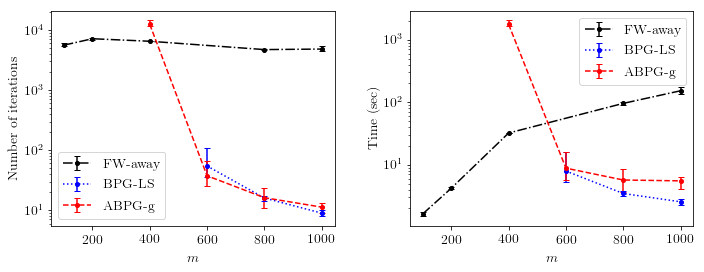

In [63]:
s = '1e-8'
meantype = 'g'
outliers = False

m = np.array(m)
Igem = np.zeros((4,len(m)))
Imax = np.zeros((4,len(m)))
Imin = np.zeros((4,len(m)))
Tgem = np.zeros((4,len(m)))
Tmax = np.zeros((4,len(m)))
Tmin = np.zeros((4,len(m)))

for i in range(4):
    for j in range(len(m)):
        idx = np.nonzero(Ieps[s][i,j] < Nmax)
        if outliers == False and len(idx[0]) > 1: 
            Ieps_sij = Ieps[s][i,j][idx]
            Teps_sij = Teps[s][i,j][idx]
        else:
            Ieps_sij = Ieps[s][i,j]
            Teps_sij = Teps[s][i,j]
            
        if meantype == 'g':
            Igem[i,j] = Ieps_sij.prod()**(1.0/len(Ieps_sij))
            Imax[i,j] = Ieps_sij.max() 
            Imin[i,j] = Ieps_sij.min()
            Tgem[i,j] = Teps_sij.prod()**(1.0/len(Teps_sij))
            Tmax[i,j] = Teps_sij.max()
            Tmin[i,j] = Teps_sij.min()
        else: 
            Igem[i,j] = Ieps_sij.sum()/len(Ieps_sij)
            Imax[i,j] = Igem[i,j] + Ieps_sij.std() 
            Imin[i,j] = Igem[i,j] - Ieps_sij.std()
            Tgem[i,j] = Teps_sij.sum()/len(Teps_sij)
            Tmax[i,j] = Tgem[i,j] + Teps_sij.std()
            Tmin[i,j] = Tgem[i,j] - Teps_sij.std()
               
# Plot required number of iterations and time
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'serif'})
matplotlib.rcParams.update({'text.usetex': True})
plt.subplots(1, 2, figsize=(10, 4))

labels = [r"FW", r"FW-away", r"BPG-LS", r"ABPG-g"]
linestyles = ['g-', 'k-.', 'b:', 'r--']

ax1 = plt.subplot(1,2,1)
for i in range(4):
    idx = np.nonzero(Igem[i] <= Nmax)[0]
    if len(idx) > 0:
        ax1.errorbar(m[idx], Igem[i,idx], yerr=[Igem[i,idx]-Imin[i,idx], Imax[i,idx]-Igem[i,idx]], 
                     fmt=linestyles[i], label=labels[i], marker='o', markersize=4, capsize=3)
ax1.legend()
ax1.set_yscale('log')
ax1.set_xlabel(r"$m$")
ax1.set_ylabel(r"Number of iterations")

ax2 = plt.subplot(1,2,2)
for i in range(4):
    idx = np.nonzero(Igem[i] <= Nmax)[0]
    if len(idx) > 0:
        ax2.errorbar(m[idx], Tgem[i,idx], yerr=[Tgem[i,idx]-Tmin[i,idx], Tmax[i,idx]-Tgem[i,idx]], 
                     fmt=linestyles[i], label=labels[i], marker='o', markersize=4, capsize=3)
ax2.legend()
ax2.set_yscale('log')
ax2.set_xlabel(r"$m$")
ax2.set_ylabel(r"Time (sec)")

plt.tight_layout(h_pad=0.5, w_pad=2)
#plt.savefig("C:\github\\accbpg\\figures\\Dopt_compareFW_n2000.pdf", bbox_inches="tight")